# TensorBoard

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

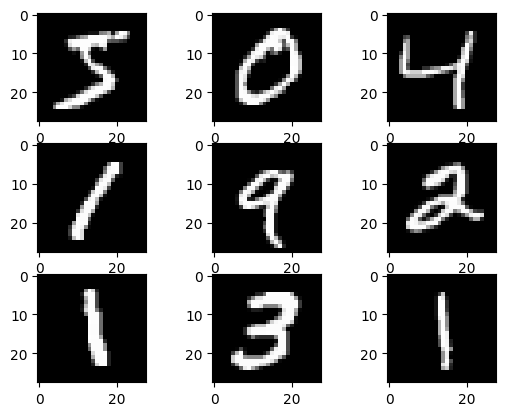

In [5]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# plot the first 9 images in the training set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6407 - loss: 1.0260 - val_accuracy: 0.9400 - val_loss: 0.2168
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8659 - loss: 0.4051 - val_accuracy: 0.9582 - val_loss: 0.1444
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8946 - loss: 0.3157 - val_accuracy: 0.9682 - val_loss: 0.1054
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9057 - loss: 0.2766 - val_accuracy: 0.9714 - val_loss: 0.0952
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9136 - loss: 0.2512 - val_accuracy: 0.9737 - val_loss: 0.0881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9672 - loss: 0.1063
Test accuracy: 0.9736999869346619


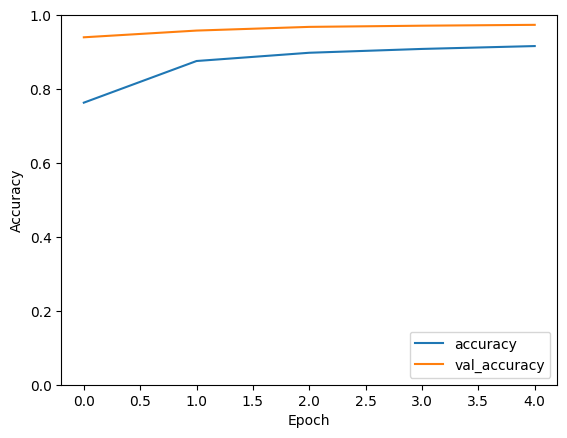

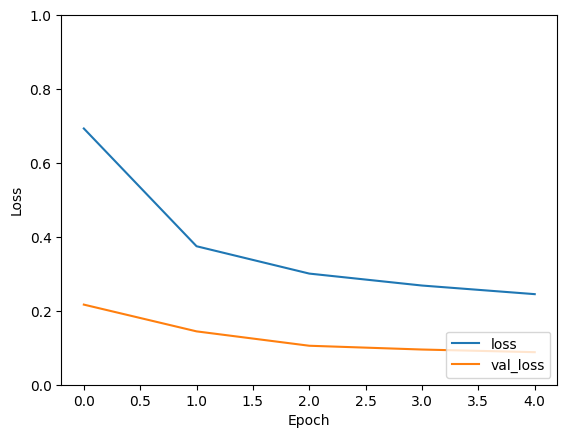

In [8]:
# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

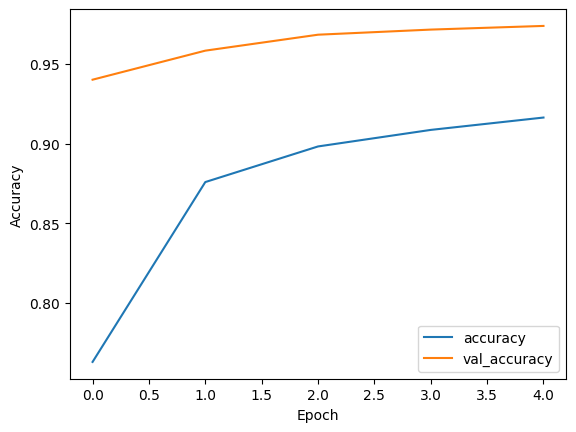

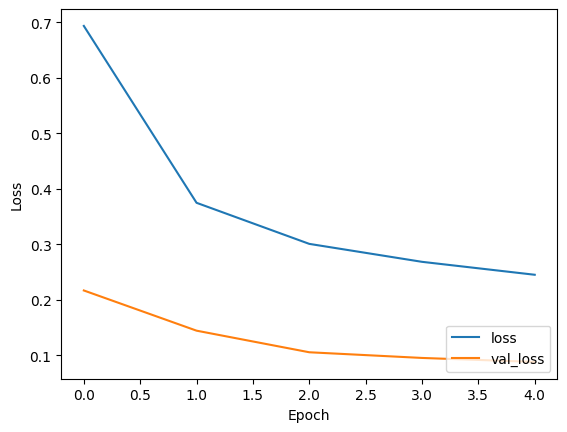

In [9]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Let's do it in tensorboard

In [10]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# # Clear any logs from previous runs
# !rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
# lets create a call back function of tensorboard
tensorboard_callback = TensorBoard(log_dir="./logs_class_run", histogram_freq=1)

In [13]:
model.fit(X_train, y_train, epochs=5, 
          batch_size=32, 
          validation_data=(X_test,y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.5528 - loss: 1.2691 - val_accuracy: 0.9304 - val_loss: 0.3032
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7806 - loss: 0.6161 - val_accuracy: 0.9561 - val_loss: 0.1863
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8033 - loss: 0.5374 - val_accuracy: 0.9592 - val_loss: 0.1608
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8193 - loss: 0.5042 - val_accuracy: 0.9672 - val_loss: 0.1473
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8462 - loss: 0.4607 - val_accuracy: 0.9706 - val_loss: 0.1114


In [15]:
# Activate inline tensorboard extension
%load_ext tensorboard

# run tensorboard of recent logs here
%tensorboard --logdir=./logs_class_run

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10512), started 0:00:33 ago. (Use '!kill 10512' to kill it.)